<a href="https://colab.research.google.com/github/Siddharthjoshi23/BOOKSERVICEAPI/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
dict={'First Score':[100,90,np.nan,95],'Second Score':[30,45,56,np.nan],'Third Score':[np.nan,40,80,98]}

In [ ]:
df=pd.DataFrame(dict)
df

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,NaN,56.0,80.0
3,95.0,NaN,98.0


In [ ]:
df.isnull()

,First Score,Second Score,Third Score
0,False,False,True
1,False,False,False
2,True,False,False
3,False,True,False


In [ ]:
df.notnull()

,First Score,Second Score,Third Score
0,True,True,False
1,True,True,True
2,False,True,True
3,True,False,True


In [ ]:
# will fill all the missing values with zero
df.fillna(0)

,First Score,Second Score,Third Score
0,100.0,30.0,0.0
1,90.0,45.0,40.0
2,0.0,56.0,80.0
3,95.0,0.0,98.0


In [ ]:
#  fill the missing value with previous one
df.fillna(method='pad')

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,90.0,56.0,80.0
3,95.0,56.0,98.0


In [ ]:
#  fill the missing value with next one
df.fillna(method='bfill')

,First Score,Second Score,Third Score
0,100.0,30.0,40.0
1,90.0,45.0,40.0
2,95.0,56.0,80.0
3,95.0,NaN,98.0


In [ ]:
df

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,NaN,56.0,80.0
3,95.0,NaN,98.0


In [ ]:
df.replace(to_replace=np.nan, value= -75)

,First Score,Second Score,Third Score
0,100.0,30.0,-75.0
1,90.0,45.0,40.0
2,-75.0,56.0,80.0
3,95.0,-75.0,98.0


In [ ]:
df.dropna(axis=1)

""
0
1
2
3


### Handling Outlier

In [ ]:
from scipy.stats.mstats import winsorize
import numpy as np

In [ ]:
a = np.array([10, 4, 9, 8, 5, 3, 7, 2, 1, 6])

In [ ]:
# winsorization
from scipy.stats.mstats import winsorize
#A shuffled array contains integers from 1 to 10.
a = np.array([10, 4, 9, 8, 5, 3, 7, 2, 1, 6])
#he 10% of the lowest value (i.e., 1) and the 20% of the highest values (i.e., 9 and 10) are replaced.
winsorize(a, limits=[0.1, 0.2])

masked_array(data=[8, 4, 8, 8, 5, 3, 7, 2, 2, 6],
             mask=False,
       fill_value=999999)

In [ ]:
# Step-1: Importing Necessary Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#Step-2:Read and Load the Dataset
df = pd.read_csv('/content/ml lab/Placement_Data_Full_Class.csv')
df.sample(2)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
159,160,M,52.00,Central,49.0,Others,Commerce,58.00,Comm&Mgmt,No,62.00,Mkt&HR,60.59,Not Placed,NaN
164,165,F,67.16,Central,72.5,Central,Commerce,63.35,Comm&Mgmt,No,53.04,Mkt&Fin,65.52,Placed,250000.0


In [20]:
df.shape

(215, 15)

In [21]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [23]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

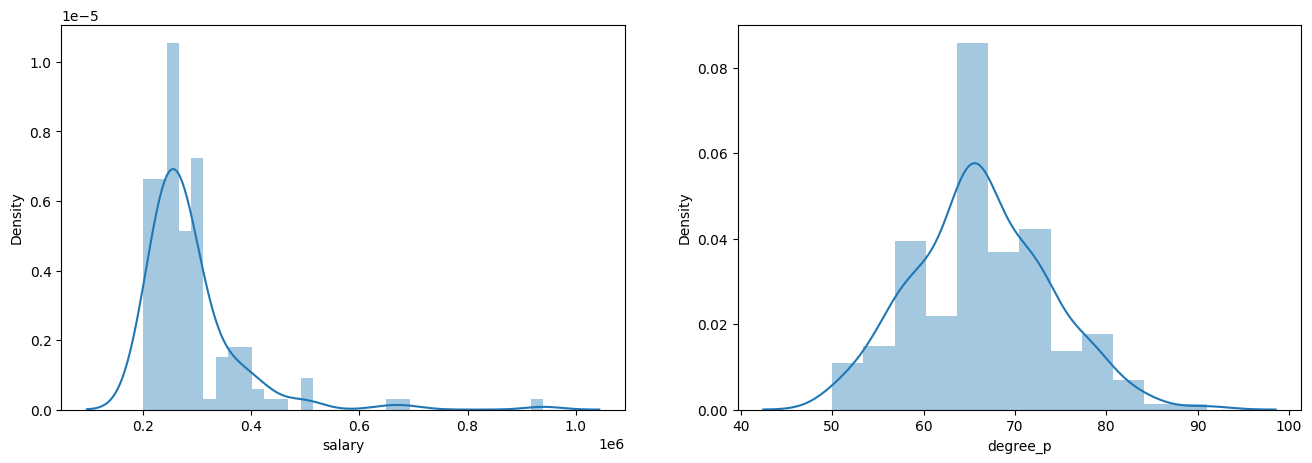

In [24]:
#Step-3: Plot the Distribution plots for the features
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['salary'])
plt.subplot(1,2,2)
sns.distplot(df['degree_p'])
plt.show()

In [29]:
#Step-4: Finding the Boundary Values
print("Highest allowed",df['salary'].mean() + 3*df['salary'].std())
print("Lowest allowed",df['salary'].mean() - 3*df['salary'].std())


Highest allowed 569027.7626641716
Lowest allowed 8283.048146639136


In [30]:
#Step-5: Finding the Outliers
df[(df['salary'] > 8283.048) | (df['salary'] <569027.76)]


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [31]:
#Step-6: Trimming of Outliers
new_df=df[(df['salary'] > 8283.048) | (df['salary'] <569027.76)]
new_df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [32]:
from scipy.stats.mstats import winsorize

In [33]:
a=df['salary']
a.shape

(215,)

In [28]:
b=winsorize(a, limits=[0.1, 0.2])
b.shape

(10,)

In [27]:
a.shape

(10,)

In [26]:
df.shape

(215, 15)

In [35]:
new_df.shape

(148, 15)

### Binning


In [56]:
bin_data = df[['hsc_p']]
bin_data = pd.cut(df['hsc_p'], bins=[0, 40, 50, 100],
                                       labels=["Low", "Mid", "High"])
print(bin_data)


0      High
1      High
2      High
3      High
4      High
       ... 
210    High
211    High
212    High
213    High
214    High
Name: hsc_p, Length: 215, dtype: category
Categories (3, object): ['Low' < 'Mid' < 'High']


In [54]:
df['ssc_p_bin']=bin_data
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,ssc_p_bin
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,High
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,High
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,High
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,High
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,High


### Feature spliiting


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2)

### Categorical Encoding

One hot encoding

Label encoding

#### one hot encoding

In [48]:
# import required modules
import pandas as pd
import numpy as np

# create dataset
df = pd.DataFrame({'Temperature': ['Hot', 'Cold', 'Warm', 'Cold'],
				})

# display dataset
print(df)



  Temperature
0         Hot
1        Cold
2        Warm
3        Cold


In [49]:
# create dymmy variables
pd.get_dummies(df)

,Temperature_Cold,Temperature_Hot,Temperature_Warm
0,0,1,0
1,1,0,0
2,0,0,1
3,1,0,0


In [50]:
# import required modules
import pandas as pd
import numpy as np

# create dataset
df = pd.DataFrame({'A': ['Alberto', 'vasanthi', 'Asalah'],
				'B': ['vasanthi', 'Alberto', 'Alberto'],
				'C': [1, 2, 3]})

# display dataset
print(df)

# create dymmy variables
pd.get_dummies(df)

          A         B  C
0   Alberto  vasanthi  1
1  vasanthi   Alberto  2
2    Asalah   Alberto  3


,C,A_Alberto,A_Asalah,A_vasanthi,B_Alberto,B_vasanthi
0,1,1,0,0,0,1
1,2,0,0,1,1,0
2,3,0,1,0,1,0


In [52]:
# Import libraries
import numpy as np
import pandas as pd

# Import dataset
df = pd.read_csv('/content/ml lab/Placement_Data_Full_Class.csv')
df.head()

df['Species'].unique()


KeyError: ignored

In [ ]:
df.columns

#### Label Encoding

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Species']= label_encoder.fit_transform(df['Species'])

df['Species'].unique()


### Normalization and standardization

In [47]:
# example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define data
data = asarray([[100, 0.001],
				[8, 0.05],
				[50, 0.005],
				[88, 0.07],
				[4, 0.1]])
#print(data)
# define min max scaler
scaler = MinMaxScaler() # means you are doing normalization
# transform data
scaled = scaler.fit_transform(data)
print(scaled)


[[1.         0.        ]
 [0.04166667 0.49494949]
 [0.47916667 0.04040404]
 [0.875      0.6969697 ]
 [0.         1.        ]]


### Feature selection

In [ ]:
# importing the library
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures=SelectKBest(score_func=chi2,k=4)

x = df.iloc[:,1:5]  #independent columns
y = df.iloc[:,-1]  #target column is species

#apply SelectKBest class to extract top 10 best features
fit=bestfeatures.fit(x,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)

#concat two dataframes for better visualization
featureScore=pd.concat([dfcolumns,dfscores],axis=1)
featureScore.columns=['Specs','Score']
featureScore

### Feature Importance

In [ ]:
import pandas as pd
import numpy as np
X = df.iloc[:,0:5]  #independent columns
y = df.iloc[:,-1]    #target column i.e species
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()